# Regression

Import the data

In [1]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)

X, y = housing['data'], housing['target']
print(X.shape)
print(y.shape)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(1460, 80)
(1460,)


In [2]:
# Keep only numerical type data
import numpy as np
X = X.select_dtypes(include= np.number)
print(X.shape)

(1460, 37)


In [3]:
## Removing rows with nan

#print(np.all(np.isnan(X), axis=0)) ## Chekcing whether all of them are nan

mask = np.any(np.isnan(X), axis=1)
X_new = X[~mask]
y_new = y[~mask]

print(X_new.shape)
print(y_new.shape)

(1121, 37)
(1121,)


### Plot

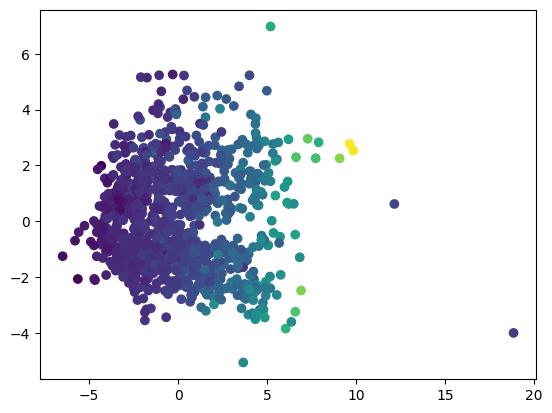

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt

pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X_new)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y_new)
plt.show()

## Training and testing

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.33, random_state=1)

## Fit a linear regression model

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
reg.coef_

array([-4.83464032e+02, -8.61234766e+03,  2.43769668e+02, -2.07829251e+03,
        2.76569768e+04,  5.20744230e+03,  8.87412877e+03,  2.53221924e+03,
        6.81657674e+03, -4.78478314e+17, -1.56139466e+17, -4.56714000e+17,
        4.55012314e+17,  1.04751784e+17,  1.17011378e+17,  1.17170916e+16,
       -1.43897975e+17,  6.43537356e+03,  8.01577268e+02,  3.03743445e+03,
       -5.26551719e+01, -7.88427812e+03, -4.67883692e+03,  7.27520263e+03,
        3.60073855e+03, -2.46430529e+03,  1.20906814e+04,  2.49320298e+03,
        2.71874690e+03, -1.07723060e+03, -9.09141719e+01,  6.26407052e+02,
        4.12607905e+03, -2.75645659e+03, -1.99124253e+02, -7.82715996e+02,
       -4.60615237e+02])

5.387318558096996e-06


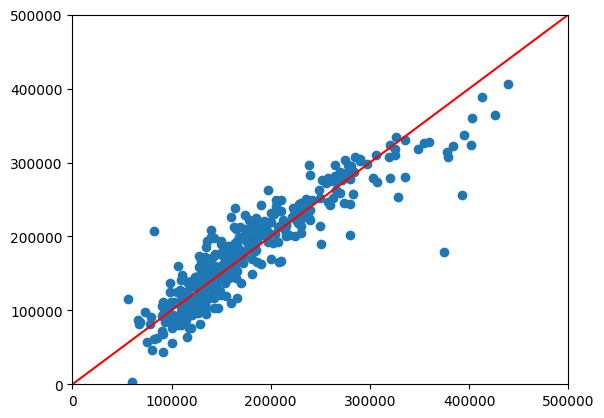

In [8]:
y_pred_LS = reg.predict(X_test)
RMSPE_reg = np.sqrt(np.mean((y_test - y_pred_LS) ** 2)) / np.var(y_test)
print(RMSPE_reg)

plot = plt.scatter(y_test, y_pred_LS)

plt.xlim((0, 500000)) # restricts x axis from 0 to 25
plt.ylim((0, 500000)) # restricts x axis from 0 to 25
plt.plot([0, 500000], [0, 500000], c='r') # plots line y = x

plt.show()

## LASSO - do it yourself

In [9]:
from sklearn import linear_model
reg_LASSO = linear_model.Lasso(alpha=20)
reg_LASSO.fit(X_train, y_train)
reg_LASSO.coef_

array([-3.86274825e+02, -8.53696101e+03, -1.95158052e+01, -2.03200351e+03,
        2.77533316e+04,  5.24730382e+03,  8.59442932e+03,  2.47420598e+03,
        6.71486574e+03,  2.11614483e+03, -7.90273385e+02, -1.83831835e+03,
       -0.00000000e+00,  1.07290843e+04,  1.00547078e+04,  6.50324332e+02,
        1.36853539e+04,  6.38525607e+03,  6.45374397e+02,  3.06304988e+03,
       -0.00000000e+00, -7.74901747e+03, -4.75028766e+03,  7.24285654e+03,
        3.69707978e+03, -2.35319082e+03,  1.21736940e+04,  2.46950576e+03,
        2.82864201e+03, -1.09068336e+03, -5.62423994e+01,  5.16300548e+02,
        3.97215483e+03, -2.63933663e+03, -6.64313102e+01, -7.66295909e+02,
       -2.76690321e+02])

5.384286496695973e-06


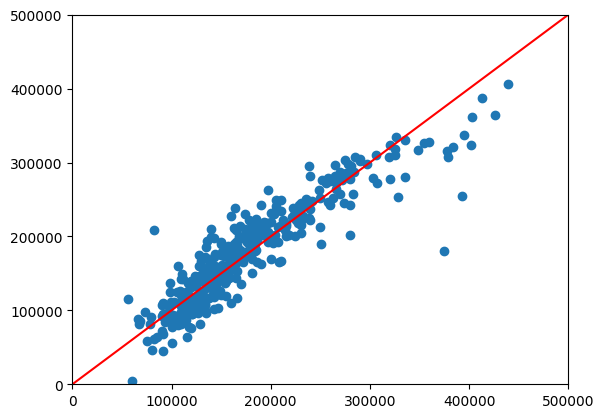

In [10]:
y_pred_LASSO = reg_LASSO.predict(X_test)
RMSPE_LASSO = np.sqrt(np.mean((y_test - y_pred_LASSO) ** 2)) / np.var(y_test)
print(RMSPE_LASSO)

plot = plt.scatter(y_test, y_pred_LASSO)
plt.xlim((0, 500000)); plt.ylim((0, 500000)); plt.plot([0, 500000], [0, 500000], c='r')
plt.show()

# GBM

In [11]:
from sklearn import ensemble

GBM = ensemble.GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=1, random_state=0, loss='squared_error', warm_start=True)
GBM.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=1, n_estimators=200, random_state=0,
                          warm_start=True)

4.8584246095029366e-06


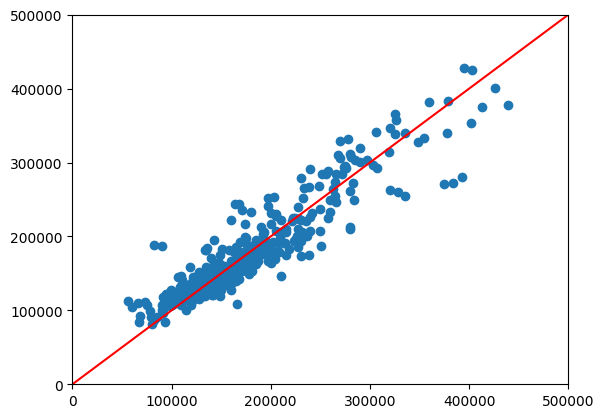

In [12]:
y_pred_GBM = GBM.predict(X_test)
RMSPE_GBM = np.sqrt(np.mean((y_test - y_pred_GBM) ** 2)) / np.var(y_test)
print(RMSPE_GBM)

plot = plt.scatter(y_test, y_pred_GBM)
plt.xlim((0, 500000)); plt.ylim((0, 500000)); plt.plot([0, 500000], [0, 500000], c='r')
plt.show()

You can try other methods such as linear_model.HuberRegressor, Gaussian Process Regression

# Classification

In [13]:
from sklearn.datasets import load_wine
from sklearn.datasets import load_iris

# https://scikit-learn.org/stable/datasets/real_world.html


winedata = load_iris()
X, y = winedata['data'], winedata['target']
print(X.shape)
print(y.shape)
# print(y)

(150, 4)
(150,)


##### Split the data, scale it

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=10)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(y_test)

[1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2 2 2 0 0 1 0 1 0 1 1 2 2 1 2 1 1 1 0 0 1 0 2 0 0 2 1 2 0 2 0 1 1 0 2 2 2
 2 2 0 1 2 1 0 2 1 1 0 0 0 1 2 2 1 0 0 0 2 2 1 1 2 2 2 2 1 0 0 1 0 0 2 1 0
 0 0]


##### Fit and predict logistic regression

In [15]:
from sklearn.linear_model import LogisticRegression

clf1 = LogisticRegression()
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)

print(y_pred)

[1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2 2 2 0 0 1 0 1 0 1 2 2 2 1 2 1 1 1 0 0 1 0 2 0 0 1 1 2 0 2 0 1 2 0 2 2 2
 2 1 0 1 2 1 0 2 1 1 0 0 0 1 2 2 1 0 0 0 2 2 1 1 2 2 2 1 1 0 0 1 0 0 2 1 0
 0 0]


##### Accuracy measures

[[38  0  0]
 [ 0 36  2]
 [ 0  3 34]]


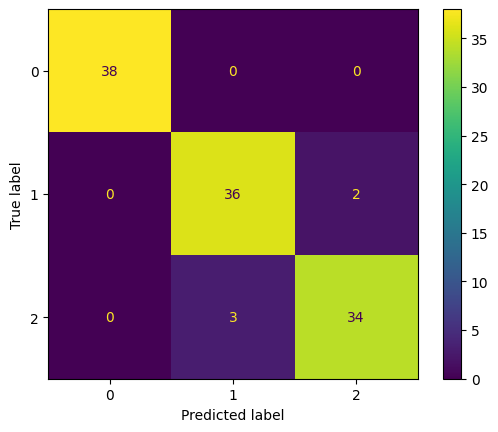

0.9557522123893806


In [16]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

# clf.predict_proba(X_test)  # Getting probabilistic output
print(clf1.score(X_test, y_test))

##### Fit and predict Multi-layer-perceptron

In [17]:
from sklearn.neural_network import MLPClassifier

clf2 = MLPClassifier(random_state=1, max_iter=1000) # Check the parameters and how to use them: hidden_layer_sizesarray, solver, learning_rate, tol and n_iter_no_change 
clf2.fit(X_train, y_train)

clf2.predict_proba(X_test)
y_pred = clf2.predict(X_test)
print(clf2.score(X_test, y_test))

print(confusion_matrix(y_test, y_pred))

0.9469026548672567
[[38  0  0]
 [ 0 34  4]
 [ 0  2 35]]


### Ensemble methods - skip now

In [18]:
# from sklearn.model_selection import cross_val_score
# from sklearn.ensemble import VotingClassifier

# eclf = VotingClassifieMLPClassifierr(estimators=[('lr', clf1), ('mlp', clf2)], voting='hard')

# for clf, label in zip([clf1, clf2, eclf], ['Logistic Regression', 'MLP', 'Ensemble']):
#   scores = cross_val_score(clf, X_test, y_test, scoring='accuracy', cv=5)
#   print("Accuracy: %0.4f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

In [19]:
## WHY? - skip for now
# eclf.fit(X_train, y_train)  

# y_pred = eclf.predict(X_test)
# print(confusion_matrix(y_test, y_pred))
# print(eclf.score(X_test, y_test))


# More Neural Network using **pytorch**, simple version (not using dataloaders, directly from arrays)

Import modules and set device

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Get cpu or gpu device for training. In google colab use Runtime > Change runtime type to enable GPU (But the it's limited time)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


### Define the model/class

This model takes uses consists of two modules with one layer of weights. 

* The first module is a **Linear layer** and has 4 variables as input, and 3 variables as output. So if the inputs are $x_1, x_2, x_3, x_4$ and the outputs are $y_1, y_2, y_3,$ each of the $y_j$'s are linear combinations of $x_i$'s. So, $y_j=\alpha_{0,j} + \sum_i \alpha_{i,j} x_i.$ In ML literature, these $\alpha_{0,j}$s' are called bias and $\alpha_{i,j}$s' are called weights.

* The next layer takes these $y_j$'s and transform it in 'some' way - it is called an **activation layer**. This transformation might be non-linear. It is sometimes sigmoid (just like a logistic regression, final output will be in 0 to 1 range), sometimes ReLU etc.

In [21]:
# Define the model

class NeuralNetwork(nn.Module):
    # This function is to initialize module state 'NeuralNetwork'. Every class should have this __init__ function somewhere.
    def __init__(self):
        nn.Module.__init__(self)         # This line says that 'nn.Module' is initialized and our new class 'NeuralNetwork' inherited all the functions already there in 'nn.Module'
        self.linear1 = nn.Linear(4, 3)   # Additional 
        self.relu1 = nn.ReLU()

    def forward(self, x):
        x1 = self.linear1(x)
        logits = self.relu1(x1)
        return logits


# # Another way: (look https://realpython.com/python-super/ for more, this type of syntax of super() works for python 3)
# class NeuralNetwork(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.linear1 = nn.Linear(4, 3)
#         self.relu1 = nn.ReLU()

#     def forward(self, x):
#         x1 = self.linear1(x)
#         logits = self.relu1(x1)
#         return logits

# 'self' refers to an instance of 'NeuralNetwork' model.
# If you want to know more about 'self', take a look here.

# Where no state or weights are required, one could use the nn.functional, instead of nn.Module
# Examples being, average pooling (nn.functional.AvgPool2d), interpolation/resizing (nn.functional.interpolate).


model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (linear1): Linear(in_features=4, out_features=3, bias=True)
  (relu1): ReLU()
)


## **Task: make the model a two layer model and run the code.**

Check dimension match etc

In [22]:
tmp_X = torch.tensor(X_train[0:2,], dtype=torch.float32).to(device)
print(tmp_X)
model.forward(tmp_X)

tensor([[-1.1634, -1.3665, -0.2652, -0.2794],
        [-0.5737,  0.7669, -1.2747, -1.0451]])


tensor([[0.0000, 0.2999, 0.0000],
        [0.0000, 0.0225, 0.8140]], grad_fn=<ReluBackward0>)

#### Specify the Loss function and the Optimizer

In [23]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()                    ## Cross entropy loss is set as loss/criterion function
optimizer = optim.Adam(model.parameters(), lr=0.05)  ## Adam optimizer is taken as the optimizer. Other options are 'SGD' (Stochastic Gradient Descent) with learning rate 0.05

#### Transforming the numpy type to torch type

In [24]:
data_x = torch.tensor(X_train, dtype=torch.float32).to(device)
data_y = torch.tensor(y_train, dtype=torch.long).to(device)
data_x_test = torch.tensor(X_test, dtype=torch.float32).to(device)
data_y_test = torch.tensor(y_test, dtype=torch.long).to(device)

#### **Train the model**

At each step, with a simple gradient optimizer (not Adam) basically the iterations would be something like:
$\boldsymbol{\theta}^{(k+1)} = \boldsymbol{\theta}^{(k)} - \alpha \cdot \boldsymbol{\nabla} loss,$ so that eventually the $loss$ would be minimum.
Here $\alpha$ is the learning rate at each iteration. 

* To keep the code simple for today, I have kept the whole data to be trained at each iteration. 

* Usually, a random chunk of the training data (called batch) is taken and trained at each epoch.

* To know more about the this modification method, look at https://stackoverflow.com/questions/53975717/pytorch-connection-between-loss-backward-and-optimizer-step

* In general an extremely good playlist to know about these https://youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi

In [25]:
for epoch in range(200):
  optimizer.zero_grad()             # making the gradient 0 initially for computational purposes, i.e., zero out the gradients 
  output = model(data_x)            # give the output with current 'weights' and 'biases'
  loss = criterion(output, data_y)  # calculate the loss with existing set of parameters 
  loss.backward()                   # calculate the gradient of the parameters, you can check the gradient values by print()
  optimizer.step()                  # update the parameters

  print("Loss at epoch", epoch, loss.item())

Loss at epoch 0 1.2046772241592407
Loss at epoch 1 1.1200634241104126
Loss at epoch 2 1.0490756034851074
Loss at epoch 3 1.0006775856018066
Loss at epoch 4 0.96529221534729
Loss at epoch 5 0.9345511198043823
Loss at epoch 6 0.9047708511352539
Loss at epoch 7 0.8743078112602234
Loss at epoch 8 0.8371710181236267
Loss at epoch 9 0.7944894433021545
Loss at epoch 10 0.751826286315918
Loss at epoch 11 0.7024930715560913
Loss at epoch 12 0.6520959138870239
Loss at epoch 13 0.604383647441864
Loss at epoch 14 0.5616618990898132
Loss at epoch 15 0.5243210792541504
Loss at epoch 16 0.4922581613063812
Loss at epoch 17 0.4653923511505127
Loss at epoch 18 0.4428617060184479
Loss at epoch 19 0.42381182312965393
Loss at epoch 20 0.4075848162174225
Loss at epoch 21 0.39356228709220886
Loss at epoch 22 0.38123950362205505
Loss at epoch 23 0.3702184855937958
Loss at epoch 24 0.3602142632007599
Loss at epoch 25 0.35096263885498047
Loss at epoch 26 0.3422876000404358
Loss at epoch 27 0.33410245180130005
L

#### **Evaluate**
* Notice that the model output is (n_test, 3) dimensional and does not say directly the class. 
* For each row, we have to pick which is the maximum and set that as the class.

In [26]:
model.eval() 
## Telling model that don't change the parameters while any function from the instance 'model' is called
## To train the model again, you can try 'model.train()'

y_pred_all = model(data_x_test.to(device))     ## [113, 3] dimensional 
y_pred = np.array(y_pred_all.cpu().argmax(1))  ## .cpu() transfers the array to cpu from cuda if it is from gpu

print((y_pred == y_test).mean())

0.9557522123893806
